In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import json

from glob import glob
from collections import defaultdict

import grl_tools

In [2]:
# Load Serap's icetop GRL files
grl_base = '/data/ana/CosmicRay/IceTop_GRL'
grl_files = sorted(glob(f'{grl_base}/IC86_20*.txt'))

it_goodruns = []
for grl_file in grl_files:
    it_goodruns += grl_tools.parse_seraps_GRL(grl_file)

In [3]:
# Load information from i3live
start = '2012-05-13 00:00:00'
end   = '2022-05-13 00:00:00'
i3_goodruns = grl_tools.i3live_grl(start, end, icetop=True)

In [4]:
# Calculate livetimes for icetop
i3_livetime = grl_tools.daily_livetime(i3_goodruns, it_goodruns)

10.2% of runs filtered out by IT GRL


In [5]:
# We need the counts for each day in the IceTop maps. Load the output from count_finder.py
prefix = '/data/user/cjoiner/icetop_12yr/stability'
count_files = sorted(glob(f'{prefix}/counts_20??_Tier?.json'))

# Load count files into a single dictionary
counts = {}
for tier in range(1, 5):
    counts[tier] = {}
    tier_files = [f for f in count_files if f'Tier{tier}' in f]
    for tier_file in tier_files:        
        with open(tier_file, 'r') as f:
            counts_i = json.load(f)
        counts[tier].update(counts_i)

In [6]:
# dictionary for ploting histogram
livetimes = defaultdict(int)
for day in sorted(i3_livetime.keys()):
    for run, runtime in i3_livetime[day].items():
        livetimes[day] += runtime

In [7]:
# make a dictionary that gives the date and rate to use in histogram for each tier
daily_rates = {1: {}, 2: {}, 3:{}, 4:{}}
for tier in counts:
    for day in livetimes:
        if day not in counts[tier].keys() or livetimes[day]==0:
            continue
        daily_rates[tier][day] = counts[tier][day]/livetimes[day]
    #print(daily_rates.keys())
    #print(daily_rates.values())

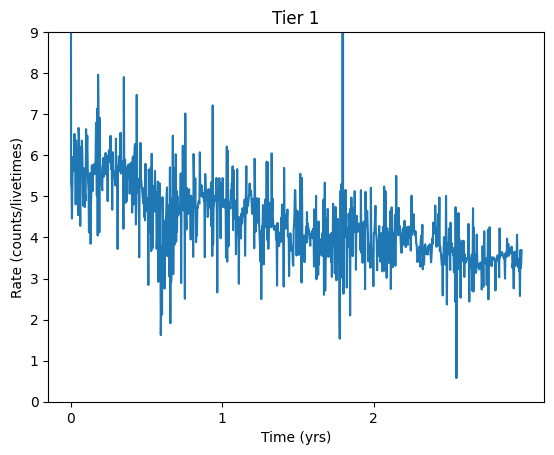

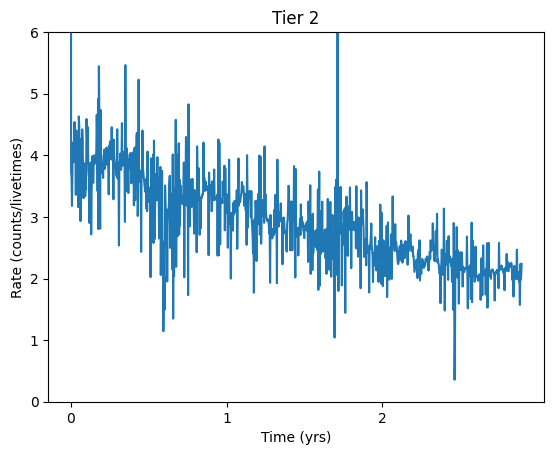

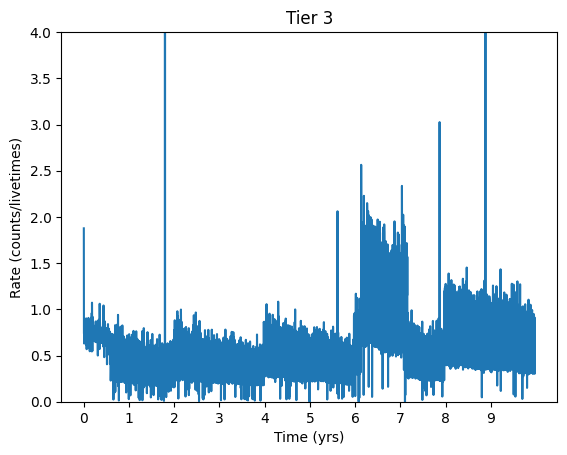

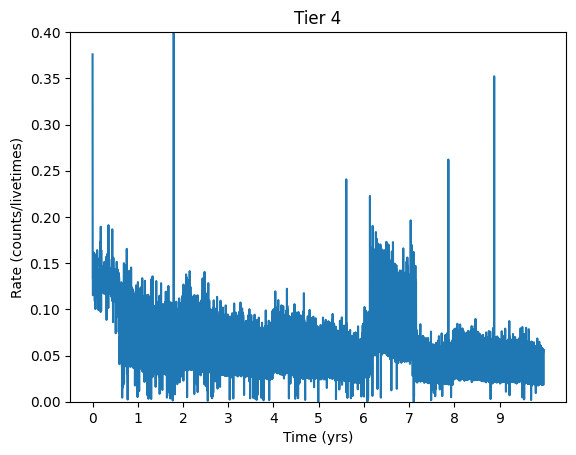

In [8]:
# make plot using daily_rates dictionary
range_dict = { 1: 9, 2: 6, 3: 4, 4: 0.4}
for tier in daily_rates:
    x = range(len(daily_rates[tier]))
    y = list(daily_rates[tier].values())
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title(f"Tier {tier}")
    ax.set_ylim((0,range_dict[tier]))
    ticks = range(0, len(daily_rates[tier]), 365)
    ax.set_xticks(ticks, labels=list(range(len(ticks))))
    plt.xlabel("Time (yrs)")
    plt.ylabel("Rate (counts/livetimes)")
    plt.show()

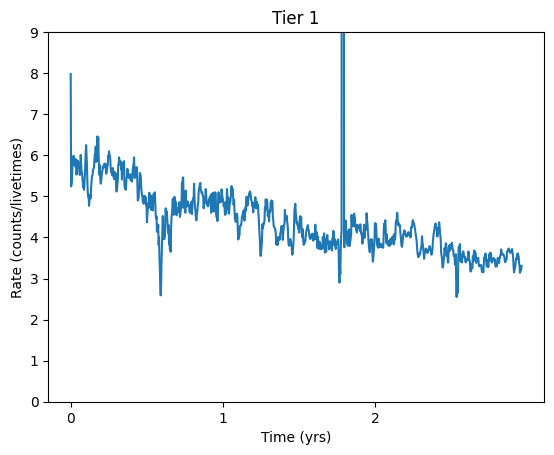

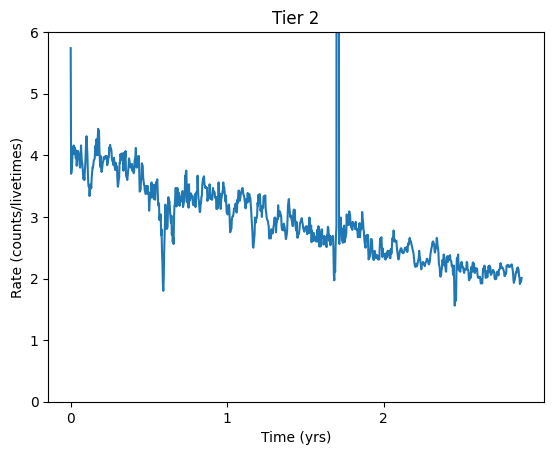

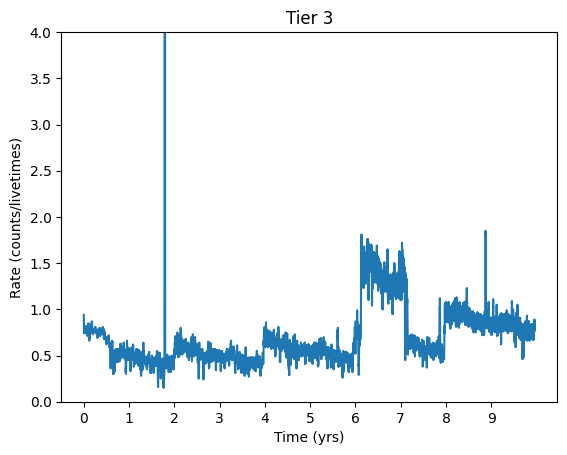

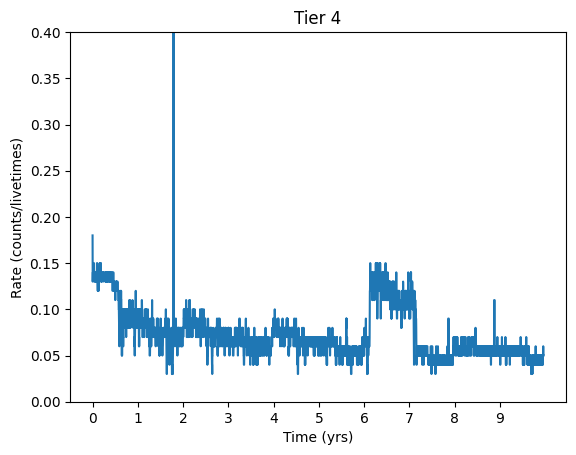

In [9]:
#plots with 5 day rolling average
range_dict = {1: 9, 2: 6, 3: 4, 4: 0.4}
window_size = 5
for tier in daily_rates:
    values = list(daily_rates[tier].values())
    # Compute moving average
    moving_averages = [
        round(float(sum(values[i:i + window_size])) / window_size, 2)
        for i in range(len(values) - window_size + 1)
    ]
    x = list(range(len(moving_averages)))
    y = moving_averages
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_title(f"Tier {tier}")
    ax.set_ylim((0,range_dict[tier]))
    ticks = range(0, len(daily_rates[tier]), 365)
    ax.set_xticks(ticks, labels=list(range(len(ticks))))
    plt.xlabel("Time (yrs)")
    plt.ylabel("Rate (counts/livetimes)")
    plt.show()